# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coeeficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  

Instead we would like to take an interative approach called **gradient descent**.



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of . For the kind of regression problems we've been examining, the resulting plot of loss vs.  will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src="./resources/gdformula.png" width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />

We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 80)
m, n = np.shape(x)

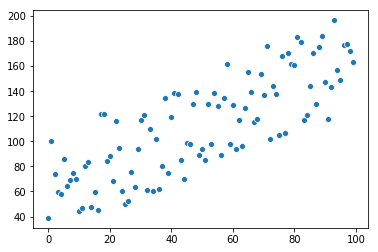

In [5]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 937.241789
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 698.714090
[1.91277491 1.80069446]
Iteration 2 | Cost: 670.592148
[1.91695894 1.89209228]
Iteration 3 | Cost: 667.246000
[1.92023731 1.92342773]
Iteration 4 | Cost: 666.817264
[1.92320479 1.93415273]
Iteration 5 | Cost: 666.732065
[1.92606551 1.93780525]
Iteration 6 | Cost: 666.687322
[1.92888949 1.93903084]
Iteration 7 | Cost: 666.647346
[1.93170077 1.93942362]
Iteration 8 | Cost: 666.607935
[1.93450761 1.93953064]
Iteration 9 | Cost: 666.568593
[1.93731282 1.93953959]
Iteration 10 | Cost: 666.529264
[1.94011738 1.93951489]
Iteration 11 | Cost: 666.489940
[1.94292163 1.93947864]
Iteration 12 | Cost: 666.450619
[1.94572567 1.93943844]
Iteration 13 | Cost: 666.411303
[1.94852956 1.93939687]
Iteration 14 | Cost: 666.371990
[1.95133329 1.93935485]
Iteration 15 | Cost: 666.332682
[1.95413688 1.93931266]
Iteration 16 | Cost: 666.293377
[1.95694032 1.93927043]
Iteration 17 | Cost: 666.254077
[1.95974362 1.93922817]
It

Iteration 632 | Cost: 642.824314
[3.65710781 1.91363779]
Iteration 633 | Cost: 642.787396
[3.65982485 1.91359683]
Iteration 634 | Cost: 642.750481
[3.66254174 1.91355587]
Iteration 635 | Cost: 642.713569
[3.6652585  1.91351491]
Iteration 636 | Cost: 642.676662
[3.66797511 1.91347395]
Iteration 637 | Cost: 642.639758
[3.67069159 1.913433  ]
Iteration 638 | Cost: 642.602858
[3.67340794 1.91339204]
Iteration 639 | Cost: 642.565962
[3.67612414 1.91335109]
Iteration 640 | Cost: 642.529069
[3.67884021 1.91331015]
Iteration 641 | Cost: 642.492180
[3.68155614 1.9132692 ]
Iteration 642 | Cost: 642.455295
[3.68427193 1.91322825]
Iteration 643 | Cost: 642.418414
[3.68698758 1.91318731]
Iteration 644 | Cost: 642.381536
[3.6897031  1.91314637]
Iteration 645 | Cost: 642.344663
[3.69241847 1.91310543]
Iteration 646 | Cost: 642.307792
[3.69513371 1.9130645 ]
Iteration 647 | Cost: 642.270926
[3.69784882 1.91302356]
Iteration 648 | Cost: 642.234063
[3.70056378 1.91298263]
Iteration 649 | Cost: 642.19720

Iteration 1131 | Cost: 624.859641
[4.99591947 1.89345314]
Iteration 1132 | Cost: 624.824546
[4.99856856 1.89341321]
Iteration 1133 | Cost: 624.789454
[5.00121753 1.89337327]
Iteration 1134 | Cost: 624.754365
[5.00386635 1.89333333]
Iteration 1135 | Cost: 624.719280
[5.00651505 1.8932934 ]
Iteration 1136 | Cost: 624.684199
[5.00916361 1.89325347]
Iteration 1137 | Cost: 624.649121
[5.01181203 1.89321354]
Iteration 1138 | Cost: 624.614046
[5.01446032 1.89317361]
Iteration 1139 | Cost: 624.578976
[5.01710848 1.89313369]
Iteration 1140 | Cost: 624.543908
[5.0197565  1.89309376]
Iteration 1141 | Cost: 624.508845
[5.02240439 1.89305384]
Iteration 1142 | Cost: 624.473785
[5.02505215 1.89301392]
Iteration 1143 | Cost: 624.438728
[5.02769976 1.89297401]
Iteration 1144 | Cost: 624.403675
[5.03034725 1.89293409]
Iteration 1145 | Cost: 624.368626
[5.0329946  1.89289418]
Iteration 1146 | Cost: 624.333580
[5.03564182 1.89285427]
Iteration 1147 | Cost: 624.298538
[5.0382889  1.89281436]
Iteration 1148

Iteration 1709 | Cost: 605.156842
[6.50489944 1.87070294]
Iteration 1710 | Cost: 605.123746
[6.50747197 1.87066416]
Iteration 1711 | Cost: 605.090653
[6.51004436 1.87062538]
Iteration 1712 | Cost: 605.057563
[6.51261663 1.8705866 ]
Iteration 1713 | Cost: 605.024477
[6.51518877 1.87054782]
Iteration 1714 | Cost: 604.991395
[6.51776077 1.87050904]
Iteration 1715 | Cost: 604.958315
[6.52033265 1.87047027]
Iteration 1716 | Cost: 604.925239
[6.5229044  1.87043149]
Iteration 1717 | Cost: 604.892166
[6.52547601 1.87039272]
Iteration 1718 | Cost: 604.859097
[6.52804749 1.87035395]
Iteration 1719 | Cost: 604.826031
[6.53061885 1.87031519]
Iteration 1720 | Cost: 604.792969
[6.53319007 1.87027642]
Iteration 1721 | Cost: 604.759909
[6.53576116 1.87023766]
Iteration 1722 | Cost: 604.726853
[6.53833213 1.8701989 ]
Iteration 1723 | Cost: 604.693801
[6.54090296 1.87016014]
Iteration 1724 | Cost: 604.660752
[6.54347366 1.87012138]
Iteration 1725 | Cost: 604.627706
[6.54604423 1.87008262]
Iteration 1726

[7.99274312 1.84827141]
Iteration 2297 | Cost: 586.264591
[7.99524016 1.84823376]
Iteration 2298 | Cost: 586.233412
[7.99773706 1.84819612]
Iteration 2299 | Cost: 586.202236
[8.00023384 1.84815847]
Iteration 2300 | Cost: 586.171063
[8.00273049 1.84812083]
Iteration 2301 | Cost: 586.139894
[8.00522702 1.84808319]
Iteration 2302 | Cost: 586.108727
[8.00772341 1.84804556]
Iteration 2303 | Cost: 586.077564
[8.01021969 1.84800792]
Iteration 2304 | Cost: 586.046404
[8.01271583 1.84797029]
Iteration 2305 | Cost: 586.015247
[8.01521185 1.84793266]
Iteration 2306 | Cost: 585.984094
[8.01770774 1.84789503]
Iteration 2307 | Cost: 585.952943
[8.02020351 1.8478574 ]
Iteration 2308 | Cost: 585.921796
[8.02269915 1.84781977]
Iteration 2309 | Cost: 585.890652
[8.02519466 1.84778215]
Iteration 2310 | Cost: 585.859511
[8.02769004 1.84774453]
Iteration 2311 | Cost: 585.828373
[8.0301853  1.84770691]
Iteration 2312 | Cost: 585.797238
[8.03268043 1.84766929]
Iteration 2313 | Cost: 585.766107
[8.03517544 1.

Iteration 2852 | Cost: 569.437721
[9.36172544 1.82763189]
Iteration 2853 | Cost: 569.408250
[9.36415301 1.82759529]
Iteration 2854 | Cost: 569.378781
[9.36658045 1.82755869]
Iteration 2855 | Cost: 569.349316
[9.36900777 1.8275221 ]
Iteration 2856 | Cost: 569.319853
[9.37143497 1.8274855 ]
Iteration 2857 | Cost: 569.290394
[9.37386204 1.82744891]
Iteration 2858 | Cost: 569.260938
[9.37628899 1.82741232]
Iteration 2859 | Cost: 569.231484
[9.37871582 1.82737573]
Iteration 2860 | Cost: 569.202034
[9.38114253 1.82733915]
Iteration 2861 | Cost: 569.172586
[9.38356911 1.82730256]
Iteration 2862 | Cost: 569.143142
[9.38599557 1.82726598]
Iteration 2863 | Cost: 569.113701
[9.3884219 1.8272294]
Iteration 2864 | Cost: 569.084262
[9.39084811 1.82719282]
Iteration 2865 | Cost: 569.054827
[9.3932742  1.82715624]
Iteration 2866 | Cost: 569.025394
[9.39570017 1.82711967]
Iteration 2867 | Cost: 568.995965
[9.39812601 1.82708309]
Iteration 2868 | Cost: 568.966538
[9.40055173 1.82704652]
Iteration 2869 |

Iteration 3418 | Cost: 553.226158
[10.71621883  1.80721081]
Iteration 3419 | Cost: 553.198332
[10.71857767  1.80717525]
Iteration 3420 | Cost: 553.170508
[10.72093638  1.80713969]
Iteration 3421 | Cost: 553.142688
[10.72329498  1.80710413]
Iteration 3422 | Cost: 553.114870
[10.72565346  1.80706857]
Iteration 3423 | Cost: 553.087055
[10.72801182  1.80703301]
Iteration 3424 | Cost: 553.059243
[10.73037006  1.80699746]
Iteration 3425 | Cost: 553.031434
[10.73272817  1.80696191]
Iteration 3426 | Cost: 553.003628
[10.73508617  1.80692636]
Iteration 3427 | Cost: 552.975824
[10.73744405  1.80689081]
Iteration 3428 | Cost: 552.948023
[10.73980181  1.80685526]
Iteration 3429 | Cost: 552.920225
[10.74215945  1.80681972]
Iteration 3430 | Cost: 552.892430
[10.74451697  1.80678417]
Iteration 3431 | Cost: 552.864638
[10.74687437  1.80674863]
Iteration 3432 | Cost: 552.836848
[10.74923165  1.80671309]
Iteration 3433 | Cost: 552.809062
[10.75158882  1.80667755]
Iteration 3434 | Cost: 552.781278
[10.75

Iteration 3958 | Cost: 538.603604
[11.97272917  1.78826698]
Iteration 3959 | Cost: 538.577261
[11.97502425  1.78823238]
Iteration 3960 | Cost: 538.550922
[11.97731921  1.78819778]
Iteration 3961 | Cost: 538.524585
[11.97961406  1.78816318]
Iteration 3962 | Cost: 538.498251
[11.98190879  1.78812858]
Iteration 3963 | Cost: 538.471919
[11.9842034   1.78809399]
Iteration 3964 | Cost: 538.445590
[11.9864979  1.7880594]
Iteration 3965 | Cost: 538.419264
[11.98879228  1.78802481]
Iteration 3966 | Cost: 538.392941
[11.99108654  1.78799022]
Iteration 3967 | Cost: 538.366620
[11.99338069  1.78795563]
Iteration 3968 | Cost: 538.340302
[11.99567472  1.78792104]
Iteration 3969 | Cost: 538.313986
[11.99796863  1.78788646]
Iteration 3970 | Cost: 538.287673
[12.00026243  1.78785187]
Iteration 3971 | Cost: 538.261363
[12.00255611  1.78781729]
Iteration 3972 | Cost: 538.235055
[12.00484968  1.78778272]
Iteration 3973 | Cost: 538.208751
[12.00714313  1.78774814]
Iteration 3974 | Cost: 538.182448
[12.0094

Iteration 4577 | Cost: 522.798565
[13.37133849  1.76718079]
Iteration 4578 | Cost: 522.773826
[13.3735626   1.76714726]
Iteration 4579 | Cost: 522.749090
[13.37578659  1.76711373]
Iteration 4580 | Cost: 522.724357
[13.37801048  1.7670802 ]
Iteration 4581 | Cost: 522.699626
[13.38023425  1.76704667]
Iteration 4582 | Cost: 522.674898
[13.38245791  1.76701315]
Iteration 4583 | Cost: 522.650172
[13.38468145  1.76697962]
Iteration 4584 | Cost: 522.625449
[13.38690488  1.7669461 ]
Iteration 4585 | Cost: 522.600728
[13.3891282   1.76691258]
Iteration 4586 | Cost: 522.576010
[13.39135141  1.76687906]
Iteration 4587 | Cost: 522.551294
[13.39357451  1.76684555]
Iteration 4588 | Cost: 522.526581
[13.39579749  1.76681203]
Iteration 4589 | Cost: 522.501870
[13.39802036  1.76677852]
Iteration 4590 | Cost: 522.477162
[13.40024311  1.76674501]
Iteration 4591 | Cost: 522.452456
[13.40246576  1.7667115 ]
Iteration 4592 | Cost: 522.427753
[13.40468829  1.76667799]
Iteration 4593 | Cost: 522.403053
[13.40

[14.59501739  1.74873194]
Iteration 5136 | Cost: 509.354109
[14.59717941  1.74869935]
Iteration 5137 | Cost: 509.330735
[14.59934132  1.74866675]
Iteration 5138 | Cost: 509.307363
[14.60150311  1.74863416]
Iteration 5139 | Cost: 509.283994
[14.6036648   1.74860157]
Iteration 5140 | Cost: 509.260627
[14.60582638  1.74856898]
Iteration 5141 | Cost: 509.237263
[14.60798785  1.74853639]
Iteration 5142 | Cost: 509.213900
[14.61014921  1.74850381]
Iteration 5143 | Cost: 509.190541
[14.61231046  1.74847122]
Iteration 5144 | Cost: 509.167183
[14.6144716   1.74843864]
Iteration 5145 | Cost: 509.143828
[14.61663263  1.74840606]
Iteration 5146 | Cost: 509.120476
[14.61879355  1.74837348]
Iteration 5147 | Cost: 509.097126
[14.62095436  1.7483409 ]
Iteration 5148 | Cost: 509.073778
[14.62311507  1.74830833]
Iteration 5149 | Cost: 509.050432
[14.62527566  1.74827575]
Iteration 5150 | Cost: 509.027089
[14.62743614  1.74824318]
Iteration 5151 | Cost: 509.003748
[14.62959651  1.74821061]
Iteration 5152

Iteration 5681 | Cost: 496.960565
[15.75930567  1.7311785 ]
Iteration 5682 | Cost: 496.938449
[15.76140861  1.7311468 ]
Iteration 5683 | Cost: 496.916335
[15.76351145  1.73111509]
Iteration 5684 | Cost: 496.894223
[15.76561417  1.73108339]
Iteration 5685 | Cost: 496.872114
[15.76771679  1.73105169]
Iteration 5686 | Cost: 496.850006
[15.7698193   1.73101999]
Iteration 5687 | Cost: 496.827901
[15.77192171  1.7309883 ]
Iteration 5688 | Cost: 496.805798
[15.77402401  1.7309566 ]
Iteration 5689 | Cost: 496.783698
[15.7761262   1.73092491]
Iteration 5690 | Cost: 496.761600
[15.77822828  1.73089321]
Iteration 5691 | Cost: 496.739504
[15.78033026  1.73086152]
Iteration 5692 | Cost: 496.717410
[15.78243214  1.73082984]
Iteration 5693 | Cost: 496.695318
[15.7845339   1.73079815]
Iteration 5694 | Cost: 496.673229
[15.78663556  1.73076646]
Iteration 5695 | Cost: 496.651142
[15.78873711  1.73073478]
Iteration 5696 | Cost: 496.629057
[15.79083856  1.7307031 ]
Iteration 5697 | Cost: 496.606974
[15.79

Iteration 6207 | Cost: 485.631902
[16.85084769  1.71472182]
Iteration 6208 | Cost: 485.610936
[16.85289524  1.71469095]
Iteration 6209 | Cost: 485.589971
[16.85494269  1.71466008]
Iteration 6210 | Cost: 485.569009
[16.85699004  1.71462922]
Iteration 6211 | Cost: 485.548049
[16.85903728  1.71459835]
Iteration 6212 | Cost: 485.527091
[16.86108441  1.71456749]
Iteration 6213 | Cost: 485.506135
[16.86313145  1.71453663]
Iteration 6214 | Cost: 485.485181
[16.86517837  1.71450577]
Iteration 6215 | Cost: 485.464229
[16.8672252   1.71447491]
Iteration 6216 | Cost: 485.443280
[16.86927192  1.71444405]
Iteration 6217 | Cost: 485.422332
[16.87131854  1.71441319]
Iteration 6218 | Cost: 485.401387
[16.87336505  1.71438234]
Iteration 6219 | Cost: 485.380444
[16.87541146  1.71435149]
Iteration 6220 | Cost: 485.359503
[16.87745776  1.71432064]
Iteration 6221 | Cost: 485.338564
[16.87950397  1.71428979]
Iteration 6222 | Cost: 485.317627
[16.88155006  1.71425894]
Iteration 6223 | Cost: 485.296692
[16.88

Iteration 6772 | Cost: 474.118433
[17.99131704  1.69752749]
Iteration 6773 | Cost: 474.098634
[17.99330672  1.69749749]
Iteration 6774 | Cost: 474.078838
[17.9952963  1.6974675]
Iteration 6775 | Cost: 474.059044
[17.99728578  1.6974375 ]
Iteration 6776 | Cost: 474.039252
[17.99927516  1.69740751]
Iteration 6777 | Cost: 474.019462
[18.00126444  1.69737752]
Iteration 6778 | Cost: 473.999674
[18.00325361  1.69734753]
Iteration 6779 | Cost: 473.979888
[18.00524269  1.69731754]
Iteration 6780 | Cost: 473.960104
[18.00723167  1.69728755]
Iteration 6781 | Cost: 473.940321
[18.00922054  1.69725757]
Iteration 6782 | Cost: 473.920541
[18.01120931  1.69722758]
Iteration 6783 | Cost: 473.900763
[18.01319799  1.6971976 ]
Iteration 6784 | Cost: 473.880987
[18.01518656  1.69716762]
Iteration 6785 | Cost: 473.861213
[18.01717503  1.69713764]
Iteration 6786 | Cost: 473.841441
[18.0191634   1.69710766]
Iteration 6787 | Cost: 473.821671
[18.02115167  1.69707769]
Iteration 6788 | Cost: 473.801903
[18.0231

Iteration 7345 | Cost: 463.097071
[19.11501813  1.68058596]
Iteration 7346 | Cost: 463.078391
[19.11695079  1.68055683]
Iteration 7347 | Cost: 463.059713
[19.11888335  1.68052769]
Iteration 7348 | Cost: 463.041037
[19.12081582  1.68049855]
Iteration 7349 | Cost: 463.022363
[19.12274819  1.68046942]
Iteration 7350 | Cost: 463.003691
[19.12468046  1.68044029]
Iteration 7351 | Cost: 462.985021
[19.12661263  1.68041116]
Iteration 7352 | Cost: 462.966352
[19.12854471  1.68038203]
Iteration 7353 | Cost: 462.947686
[19.13047668  1.6803529 ]
Iteration 7354 | Cost: 462.929022
[19.13240856  1.68032378]
Iteration 7355 | Cost: 462.910359
[19.13434034  1.68029465]
Iteration 7356 | Cost: 462.891698
[19.13627203  1.68026553]
Iteration 7357 | Cost: 462.873039
[19.13820361  1.68023641]
Iteration 7358 | Cost: 462.854382
[19.1401351   1.68020729]
Iteration 7359 | Cost: 462.835727
[19.14206648  1.68017817]
Iteration 7360 | Cost: 462.817074
[19.14399777  1.68014905]
Iteration 7361 | Cost: 462.798423
[19.14

Iteration 7894 | Cost: 453.121867
[20.16143361  1.66480964]
Iteration 7895 | Cost: 453.104200
[20.16331318  1.6647813 ]
Iteration 7896 | Cost: 453.086534
[20.16519265  1.66475296]
Iteration 7897 | Cost: 453.068871
[20.16707202  1.66472463]
Iteration 7898 | Cost: 453.051209
[20.1689513  1.6646963]
Iteration 7899 | Cost: 453.033548
[20.17083049  1.66466796]
Iteration 7900 | Cost: 453.015890
[20.17270957  1.66463963]
Iteration 7901 | Cost: 452.998233
[20.17458857  1.6646113 ]
Iteration 7902 | Cost: 452.980578
[20.17646747  1.66458298]
Iteration 7903 | Cost: 452.962925
[20.17834627  1.66455465]
Iteration 7904 | Cost: 452.945274
[20.18022498  1.66452633]
Iteration 7905 | Cost: 452.927625
[20.18210359  1.664498  ]
Iteration 7906 | Cost: 452.909977
[20.1839821   1.66446968]
Iteration 7907 | Cost: 452.892331
[20.18586052  1.66444136]
Iteration 7908 | Cost: 452.874687
[20.18773885  1.66441304]
Iteration 7909 | Cost: 452.857045
[20.18961708  1.66438473]
Iteration 7910 | Cost: 452.839404
[20.1914

Iteration 8456 | Cost: 443.470150
[21.20285597  1.64910859]
Iteration 8457 | Cost: 443.453462
[21.20468269  1.64908105]
Iteration 8458 | Cost: 443.436776
[21.20650932  1.64905351]
Iteration 8459 | Cost: 443.420091
[21.20833586  1.64902597]
Iteration 8460 | Cost: 443.403408
[21.2101623   1.64899843]
Iteration 8461 | Cost: 443.386727
[21.21198865  1.6489709 ]
Iteration 8462 | Cost: 443.370048
[21.21381491  1.64894337]
Iteration 8463 | Cost: 443.353370
[21.21564107  1.64891583]
Iteration 8464 | Cost: 443.336694
[21.21746715  1.6488883 ]
Iteration 8465 | Cost: 443.320020
[21.21929313  1.64886077]
Iteration 8466 | Cost: 443.303347
[21.22111901  1.64883324]
Iteration 8467 | Cost: 443.286676
[21.22294481  1.64880572]
Iteration 8468 | Cost: 443.270007
[21.22477051  1.64877819]
Iteration 8469 | Cost: 443.253339
[21.22659612  1.64875067]
Iteration 8470 | Cost: 443.236673
[21.22842164  1.64872315]
Iteration 8471 | Cost: 443.220009
[21.23024706  1.64869563]
Iteration 8472 | Cost: 443.203346
[21.23

Iteration 9049 | Cost: 433.865618
[22.26999305  1.63301985]
Iteration 9050 | Cost: 433.849905
[22.27176563  1.63299313]
Iteration 9051 | Cost: 433.834194
[22.27353811  1.6329664 ]
Iteration 9052 | Cost: 433.818483
[22.2753105   1.63293968]
Iteration 9053 | Cost: 433.802775
[22.2770828   1.63291296]
Iteration 9054 | Cost: 433.787068
[22.27885502  1.63288624]
Iteration 9055 | Cost: 433.771363
[22.28062714  1.63285953]
Iteration 9056 | Cost: 433.755659
[22.28239917  1.63283281]
Iteration 9057 | Cost: 433.739957
[22.28417111  1.6328061 ]
Iteration 9058 | Cost: 433.724257
[22.28594297  1.63277938]
Iteration 9059 | Cost: 433.708558
[22.28771473  1.63275267]
Iteration 9060 | Cost: 433.692861
[22.2894864   1.63272596]
Iteration 9061 | Cost: 433.677165
[22.29125799  1.63269925]
Iteration 9062 | Cost: 433.661471
[22.29302948  1.63267254]
Iteration 9063 | Cost: 433.645778
[22.29480088  1.63264584]
Iteration 9064 | Cost: 433.630087
[22.2965722   1.63261913]
Iteration 9065 | Cost: 433.614398
[22.29

Iteration 9619 | Cost: 425.162766
[23.26591257  1.61800483]
Iteration 9620 | Cost: 425.147936
[23.26763461  1.61797887]
Iteration 9621 | Cost: 425.133108
[23.26935656  1.61795291]
Iteration 9622 | Cost: 425.118281
[23.27107842  1.61792695]
Iteration 9623 | Cost: 425.103455
[23.2728002   1.61790099]
Iteration 9624 | Cost: 425.088631
[23.27452188  1.61787503]
Iteration 9625 | Cost: 425.073809
[23.27624348  1.61784907]
Iteration 9626 | Cost: 425.058988
[23.277965    1.61782312]
Iteration 9627 | Cost: 425.044168
[23.27968642  1.61779717]
Iteration 9628 | Cost: 425.029350
[23.28140776  1.61777122]
Iteration 9629 | Cost: 425.014534
[23.28312901  1.61774526]
Iteration 9630 | Cost: 424.999719
[23.28485017  1.61771932]
Iteration 9631 | Cost: 424.984905
[23.28657125  1.61769337]
Iteration 9632 | Cost: 424.970093
[23.28829224  1.61766742]
Iteration 9633 | Cost: 424.955283
[23.29001314  1.61764148]
Iteration 9634 | Cost: 424.940474
[23.29173396  1.61761553]
Iteration 9635 | Cost: 424.925666
[23.29

Iteration 10186 | Cost: 416.991067
[24.22841957  1.60349355]
Iteration 10187 | Cost: 416.977066
[24.23009276  1.60346833]
Iteration 10188 | Cost: 416.963067
[24.23176588  1.6034431 ]
Iteration 10189 | Cost: 416.949069
[24.2334389   1.60341788]
Iteration 10190 | Cost: 416.935073
[24.23511185  1.60339266]
Iteration 10191 | Cost: 416.921077
[24.2367847   1.60336743]
Iteration 10192 | Cost: 416.907084
[24.23845748  1.60334222]
Iteration 10193 | Cost: 416.893092
[24.24013016  1.603317  ]
Iteration 10194 | Cost: 416.879101
[24.24180277  1.60329178]
Iteration 10195 | Cost: 416.865111
[24.24347529  1.60326656]
Iteration 10196 | Cost: 416.851123
[24.24514772  1.60324135]
Iteration 10197 | Cost: 416.837137
[24.24682007  1.60321614]
Iteration 10198 | Cost: 416.823152
[24.24849233  1.60319092]
Iteration 10199 | Cost: 416.809168
[24.25016451  1.60316571]
Iteration 10200 | Cost: 416.795186
[24.2518366  1.6031405]
Iteration 10201 | Cost: 416.781205
[24.25350861  1.6031153 ]
Iteration 10202 | Cost: 41

Iteration 10705 | Cost: 409.912358
[25.08549556  1.59057181]
Iteration 10706 | Cost: 409.899075
[25.08712527  1.59054724]
Iteration 10707 | Cost: 409.885794
[25.08875489  1.59052267]
Iteration 10708 | Cost: 409.872514
[25.09038443  1.5904981 ]
Iteration 10709 | Cost: 409.859236
[25.09201389  1.59047354]
Iteration 10710 | Cost: 409.845959
[25.09364327  1.59044897]
Iteration 10711 | Cost: 409.832683
[25.09527256  1.59042441]
Iteration 10712 | Cost: 409.819409
[25.09690177  1.59039984]
Iteration 10713 | Cost: 409.806136
[25.0985309   1.59037528]
Iteration 10714 | Cost: 409.792864
[25.10015995  1.59035072]
Iteration 10715 | Cost: 409.779594
[25.10178891  1.59032616]
Iteration 10716 | Cost: 409.766325
[25.10341779  1.5903016 ]
Iteration 10717 | Cost: 409.753058
[25.10504659  1.59027705]
Iteration 10718 | Cost: 409.739791
[25.10667531  1.59025249]
Iteration 10719 | Cost: 409.726526
[25.10830394  1.59022794]
Iteration 10720 | Cost: 409.713263
[25.10993249  1.59020339]
Iteration 10721 | Cost: 

Iteration 11304 | Cost: 402.192805
[26.04702796  1.57607523]
Iteration 11305 | Cost: 402.180306
[26.04860888  1.57605139]
Iteration 11306 | Cost: 402.167808
[26.05018972  1.57602756]
Iteration 11307 | Cost: 402.155311
[26.05177048  1.57600373]
Iteration 11308 | Cost: 402.142816
[26.05335115  1.57597989]
Iteration 11309 | Cost: 402.130322
[26.05493175  1.57595607]
Iteration 11310 | Cost: 402.117829
[26.05651226  1.57593224]
Iteration 11311 | Cost: 402.105338
[26.0580927   1.57590841]
Iteration 11312 | Cost: 402.092848
[26.05967306  1.57588458]
Iteration 11313 | Cost: 402.080359
[26.06125333  1.57586076]
Iteration 11314 | Cost: 402.067871
[26.06283353  1.57583693]
Iteration 11315 | Cost: 402.055385
[26.06441364  1.57581311]
Iteration 11316 | Cost: 402.042900
[26.06599368  1.57578929]
Iteration 11317 | Cost: 402.030416
[26.06757363  1.57576547]
Iteration 11318 | Cost: 402.017934
[26.06915351  1.57574165]
Iteration 11319 | Cost: 402.005452
[26.0707333   1.57571783]
Iteration 11320 | Cost: 

Iteration 11891 | Cost: 395.069785
[26.96136482  1.56229019]
Iteration 11892 | Cost: 395.058009
[26.96289934  1.56226705]
Iteration 11893 | Cost: 395.046234
[26.96443378  1.56224392]
Iteration 11894 | Cost: 395.034460
[26.96596815  1.56222079]
Iteration 11895 | Cost: 395.022687
[26.96750244  1.56219765]
Iteration 11896 | Cost: 395.010916
[26.96903665  1.56217452]
Iteration 11897 | Cost: 394.999146
[26.97057078  1.56215139]
Iteration 11898 | Cost: 394.987377
[26.97210484  1.56212827]
Iteration 11899 | Cost: 394.975609
[26.97363881  1.56210514]
Iteration 11900 | Cost: 394.963842
[26.97517271  1.56208201]
Iteration 11901 | Cost: 394.952077
[26.97670653  1.56205889]
Iteration 11902 | Cost: 394.940313
[26.97824027  1.56203577]
Iteration 11903 | Cost: 394.928550
[26.97977394  1.56201264]
Iteration 11904 | Cost: 394.916788
[26.98130753  1.56198952]
Iteration 11905 | Cost: 394.905027
[26.98284104  1.5619664 ]
Iteration 11906 | Cost: 394.893268
[26.98437447  1.56194328]
Iteration 11907 | Cost: 

Iteration 12454 | Cost: 388.625332
[27.81309806  1.549449  ]
Iteration 12455 | Cost: 388.614210
[27.81458936  1.54942651]
Iteration 12456 | Cost: 388.603089
[27.81608059  1.54940403]
Iteration 12457 | Cost: 388.591969
[27.81757174  1.54938155]
Iteration 12458 | Cost: 388.580850
[27.81906281  1.54935907]
Iteration 12459 | Cost: 388.569733
[27.82055381  1.54933659]
Iteration 12460 | Cost: 388.558616
[27.82204474  1.54931411]
Iteration 12461 | Cost: 388.547501
[27.82353559  1.54929164]
Iteration 12462 | Cost: 388.536387
[27.82502636  1.54926916]
Iteration 12463 | Cost: 388.525274
[27.82651706  1.54924669]
Iteration 12464 | Cost: 388.514161
[27.82800768  1.54922421]
Iteration 12465 | Cost: 388.503051
[27.82949822  1.54920174]
Iteration 12466 | Cost: 388.491941
[27.8309887   1.54917927]
Iteration 12467 | Cost: 388.480832
[27.83247909  1.5491568 ]
Iteration 12468 | Cost: 388.469725
[27.83396941  1.54913433]
Iteration 12469 | Cost: 388.458618
[27.83545965  1.54911186]
Iteration 12470 | Cost: 

[28.64808852  1.53686023]
Iteration 13023 | Cost: 382.475765
[28.64953746  1.53683838]
Iteration 13024 | Cost: 382.465267
[28.65098632  1.53681654]
Iteration 13025 | Cost: 382.454770
[28.6524351  1.5367947]
Iteration 13026 | Cost: 382.444274
[28.65388382  1.53677286]
Iteration 13027 | Cost: 382.433779
[28.65533246  1.53675101]
Iteration 13028 | Cost: 382.423285
[28.65678102  1.53672918]
Iteration 13029 | Cost: 382.412792
[28.65822951  1.53670734]
Iteration 13030 | Cost: 382.402301
[28.65967793  1.5366855 ]
Iteration 13031 | Cost: 382.391810
[28.66112628  1.53666366]
Iteration 13032 | Cost: 382.381321
[28.66257455  1.53664183]
Iteration 13033 | Cost: 382.370832
[28.66402275  1.53662   ]
Iteration 13034 | Cost: 382.360345
[28.66547087  1.53659816]
Iteration 13035 | Cost: 382.349858
[28.66691893  1.53657633]
Iteration 13036 | Cost: 382.339373
[28.6683669  1.5365545]
Iteration 13037 | Cost: 382.328889
[28.66981481  1.53653267]
Iteration 13038 | Cost: 382.318405
[28.67126264  1.53651084]
It

Iteration 13582 | Cost: 376.770399
[29.44809143  1.52479895]
Iteration 13583 | Cost: 376.760479
[29.44949977  1.52477772]
Iteration 13584 | Cost: 376.750561
[29.45090804  1.52475649]
Iteration 13585 | Cost: 376.740644
[29.45231623  1.52473526]
Iteration 13586 | Cost: 376.730728
[29.45372436  1.52471403]
Iteration 13587 | Cost: 376.720813
[29.45513241  1.5246928 ]
Iteration 13588 | Cost: 376.710899
[29.45654039  1.52467157]
Iteration 13589 | Cost: 376.700986
[29.45794831  1.52465034]
Iteration 13590 | Cost: 376.691074
[29.45935614  1.52462912]
Iteration 13591 | Cost: 376.681163
[29.46076391  1.52460789]
Iteration 13592 | Cost: 376.671253
[29.46217161  1.52458667]
Iteration 13593 | Cost: 376.661344
[29.46357923  1.52456545]
Iteration 13594 | Cost: 376.651436
[29.46498679  1.52454423]
Iteration 13595 | Cost: 376.641529
[29.46639427  1.52452301]
Iteration 13596 | Cost: 376.631623
[29.46780168  1.52450179]
Iteration 13597 | Cost: 376.621718
[29.46920902  1.52448057]
Iteration 13598 | Cost: 

[30.30905598  1.51181858]
Iteration 14204 | Cost: 370.791109
[30.31042064  1.51179801]
Iteration 14205 | Cost: 370.781797
[30.31178522  1.51177744]
Iteration 14206 | Cost: 370.772486
[30.31314973  1.51175686]
Iteration 14207 | Cost: 370.763175
[30.31451418  1.51173629]
Iteration 14208 | Cost: 370.753866
[30.31587855  1.51171572]
Iteration 14209 | Cost: 370.744557
[30.31724286  1.51169515]
Iteration 14210 | Cost: 370.735250
[30.3186071   1.51167459]
Iteration 14211 | Cost: 370.725943
[30.31997126  1.51165402]
Iteration 14212 | Cost: 370.716637
[30.32133536  1.51163345]
Iteration 14213 | Cost: 370.707333
[30.32269939  1.51161289]
Iteration 14214 | Cost: 370.698029
[30.32406335  1.51159232]
Iteration 14215 | Cost: 370.688726
[30.32542724  1.51157176]
Iteration 14216 | Cost: 370.679424
[30.32679106  1.5115512 ]
Iteration 14217 | Cost: 370.670123
[30.32815482  1.51153064]
Iteration 14218 | Cost: 370.660823
[30.3295185   1.51151008]
Iteration 14219 | Cost: 370.651524
[30.33088211  1.51148952

Iteration 14798 | Cost: 365.422751
[31.10890918  1.49975956]
Iteration 14799 | Cost: 365.413984
[31.11023325  1.4997396 ]
Iteration 14800 | Cost: 365.405217
[31.11155724  1.49971964]
Iteration 14801 | Cost: 365.396451
[31.11288118  1.49969968]
Iteration 14802 | Cost: 365.387686
[31.11420504  1.49967972]
Iteration 14803 | Cost: 365.378922
[31.11552884  1.49965976]
Iteration 14804 | Cost: 365.370159
[31.11685257  1.4996398 ]
Iteration 14805 | Cost: 365.361397
[31.11817623  1.49961985]
Iteration 14806 | Cost: 365.352636
[31.11949983  1.49959989]
Iteration 14807 | Cost: 365.343875
[31.12082335  1.49957994]
Iteration 14808 | Cost: 365.335116
[31.12214682  1.49955999]
Iteration 14809 | Cost: 365.326357
[31.12347021  1.49954003]
Iteration 14810 | Cost: 365.317600
[31.12479354  1.49952008]
Iteration 14811 | Cost: 365.308843
[31.1261168   1.49950013]
Iteration 14812 | Cost: 365.300087
[31.12743999  1.49948018]
Iteration 14813 | Cost: 365.291332
[31.12876312  1.49946023]
Iteration 14814 | Cost: 

Iteration 15453 | Cost: 359.866453
[31.96193975  1.48689881]
Iteration 15454 | Cost: 359.858249
[31.96322053  1.4868795 ]
Iteration 15455 | Cost: 359.850046
[31.96450124  1.48686019]
Iteration 15456 | Cost: 359.841844
[31.96578189  1.48684089]
Iteration 15457 | Cost: 359.833643
[31.96706248  1.48682158]
Iteration 15458 | Cost: 359.825443
[31.968343    1.48680227]
Iteration 15459 | Cost: 359.817243
[31.96962346  1.48678297]
Iteration 15460 | Cost: 359.809045
[31.97090385  1.48676366]
Iteration 15461 | Cost: 359.800847
[31.97218418  1.48674436]
Iteration 15462 | Cost: 359.792650
[31.97346444  1.48672506]
Iteration 15463 | Cost: 359.784454
[31.97474463  1.48670576]
Iteration 15464 | Cost: 359.776258
[31.97602477  1.48668646]
Iteration 15465 | Cost: 359.768064
[31.97730483  1.48666716]
Iteration 15466 | Cost: 359.759870
[31.97858483  1.48664786]
Iteration 15467 | Cost: 359.751677
[31.97986477  1.48662856]
Iteration 15468 | Cost: 359.743485
[31.98114464  1.48660927]
Iteration 15469 | Cost: 

Iteration 16078 | Cost: 354.898140
[32.74988753  1.47501928]
Iteration 16079 | Cost: 354.890440
[32.75112833  1.47500058]
Iteration 16080 | Cost: 354.882742
[32.75236906  1.47498187]
Iteration 16081 | Cost: 354.875044
[32.75360973  1.47496317]
Iteration 16082 | Cost: 354.867347
[32.75485034  1.47494446]
Iteration 16083 | Cost: 354.859650
[32.75609089  1.47492576]
Iteration 16084 | Cost: 354.851955
[32.75733138  1.47490706]
Iteration 16085 | Cost: 354.844260
[32.7585718   1.47488836]
Iteration 16086 | Cost: 354.836566
[32.75981216  1.47486966]
Iteration 16087 | Cost: 354.828873
[32.76105245  1.47485096]
Iteration 16088 | Cost: 354.821180
[32.76229268  1.47483226]
Iteration 16089 | Cost: 354.813489
[32.76353285  1.47481356]
Iteration 16090 | Cost: 354.805798
[32.76477296  1.47479486]
Iteration 16091 | Cost: 354.798108
[32.766013    1.47477617]
Iteration 16092 | Cost: 354.790418
[32.76725298  1.47475747]
Iteration 16093 | Cost: 354.782730
[32.7684929   1.47473878]
Iteration 16094 | Cost: 

Iteration 16671 | Cost: 350.466805
[33.47473959  1.46409102]
Iteration 16672 | Cost: 350.459556
[33.47594361  1.46407287]
Iteration 16673 | Cost: 350.452307
[33.47714756  1.46405472]
Iteration 16674 | Cost: 350.445058
[33.47835146  1.46403657]
Iteration 16675 | Cost: 350.437811
[33.47955529  1.46401842]
Iteration 16676 | Cost: 350.430564
[33.48075907  1.46400027]
Iteration 16677 | Cost: 350.423318
[33.48196278  1.46398212]
Iteration 16678 | Cost: 350.416073
[33.48316643  1.46396397]
Iteration 16679 | Cost: 350.408828
[33.48437002  1.46394583]
Iteration 16680 | Cost: 350.401584
[33.48557355  1.46392768]
Iteration 16681 | Cost: 350.394341
[33.48677702  1.46390954]
Iteration 16682 | Cost: 350.387098
[33.48798043  1.4638914 ]
Iteration 16683 | Cost: 350.379857
[33.48918378  1.46387325]
Iteration 16684 | Cost: 350.372616
[33.49038706  1.46385511]
Iteration 16685 | Cost: 350.365376
[33.49159029  1.46383697]
Iteration 16686 | Cost: 350.358136
[33.49279345  1.46381883]
Iteration 16687 | Cost: 

Iteration 17202 | Cost: 346.718879
[34.10555284  1.45458054]
Iteration 17203 | Cost: 346.712010
[34.10672485  1.45456287]
Iteration 17204 | Cost: 346.705141
[34.1078968  1.4545452]
Iteration 17205 | Cost: 346.698273
[34.10906869  1.45452753]
Iteration 17206 | Cost: 346.691405
[34.11024052  1.45450987]
Iteration 17207 | Cost: 346.684539
[34.1114123  1.4544922]
Iteration 17208 | Cost: 346.677673
[34.11258401  1.45447453]
Iteration 17209 | Cost: 346.670808
[34.11375566  1.45445687]
Iteration 17210 | Cost: 346.663943
[34.11492725  1.45443921]
Iteration 17211 | Cost: 346.657079
[34.11609879  1.45442154]
Iteration 17212 | Cost: 346.650216
[34.11727026  1.45440388]
Iteration 17213 | Cost: 346.643354
[34.11844168  1.45438622]
Iteration 17214 | Cost: 346.636492
[34.11961303  1.45436856]
Iteration 17215 | Cost: 346.629631
[34.12078433  1.4543509 ]
Iteration 17216 | Cost: 346.622770
[34.12195556  1.45433324]
Iteration 17217 | Cost: 346.615911
[34.12312674  1.45431559]
Iteration 17218 | Cost: 346.

Iteration 17858 | Cost: 342.359051
[34.86175464  1.44317963]
Iteration 17859 | Cost: 342.352624
[34.86288828  1.44316254]
Iteration 17860 | Cost: 342.346198
[34.86402186  1.44314545]
Iteration 17861 | Cost: 342.339772
[34.86515538  1.44312836]
Iteration 17862 | Cost: 342.333347
[34.86628885  1.44311127]
Iteration 17863 | Cost: 342.326922
[34.86742226  1.44309418]
Iteration 17864 | Cost: 342.320499
[34.86855561  1.4430771 ]
Iteration 17865 | Cost: 342.314076
[34.8696889   1.44306001]
Iteration 17866 | Cost: 342.307653
[34.87082214  1.44304292]
Iteration 17867 | Cost: 342.301232
[34.87195532  1.44302584]
Iteration 17868 | Cost: 342.294810
[34.87308844  1.44300876]
Iteration 17869 | Cost: 342.288390
[34.8742215   1.44299167]
Iteration 17870 | Cost: 342.281970
[34.8753545   1.44297459]
Iteration 17871 | Cost: 342.275551
[34.87648745  1.44295751]
Iteration 17872 | Cost: 342.269133
[34.87762034  1.44294043]
Iteration 17873 | Cost: 342.262715
[34.87875318  1.44292335]
Iteration 17874 | Cost: 

[35.52400529  1.43319518]
Iteration 18452 | Cost: 338.654031
[35.52510533  1.4331786 ]
Iteration 18453 | Cost: 338.647980
[35.5262053   1.43316201]
Iteration 18454 | Cost: 338.641930
[35.52730523  1.43314543]
Iteration 18455 | Cost: 338.635880
[35.52840509  1.43312885]
Iteration 18456 | Cost: 338.629831
[35.5295049   1.43311227]
Iteration 18457 | Cost: 338.623783
[35.53060466  1.43309569]
Iteration 18458 | Cost: 338.617735
[35.53170436  1.43307911]
Iteration 18459 | Cost: 338.611687
[35.532804    1.43306253]
Iteration 18460 | Cost: 338.605641
[35.53390359  1.43304595]
Iteration 18461 | Cost: 338.599595
[35.53500312  1.43302937]
Iteration 18462 | Cost: 338.593549
[35.5361026  1.4330128]
Iteration 18463 | Cost: 338.587504
[35.53720202  1.43299622]
Iteration 18464 | Cost: 338.581460
[35.53830138  1.43297965]
Iteration 18465 | Cost: 338.575417
[35.53940069  1.43296307]
Iteration 18466 | Cost: 338.569374
[35.54049994  1.4329465 ]
Iteration 18467 | Cost: 338.563331
[35.54159914  1.43292993]


Iteration 19033 | Cost: 335.239877
[36.15487979  1.42368378]
Iteration 19034 | Cost: 335.234173
[36.15594781  1.42366767]
Iteration 19035 | Cost: 335.228469
[36.15701578  1.42365157]
Iteration 19036 | Cost: 335.222766
[36.1580837   1.42363547]
Iteration 19037 | Cost: 335.217063
[36.15915156  1.42361937]
Iteration 19038 | Cost: 335.211361
[36.16021936  1.42360327]
Iteration 19039 | Cost: 335.205659
[36.16128711  1.42358718]
Iteration 19040 | Cost: 335.199958
[36.16235481  1.42357108]
Iteration 19041 | Cost: 335.194258
[36.16342245  1.42355498]
Iteration 19042 | Cost: 335.188558
[36.16449004  1.42353889]
Iteration 19043 | Cost: 335.182858
[36.16555757  1.42352279]
Iteration 19044 | Cost: 335.177160
[36.16662506  1.4235067 ]
Iteration 19045 | Cost: 335.171462
[36.16769248  1.4234906 ]
Iteration 19046 | Cost: 335.165764
[36.16875985  1.42347451]
Iteration 19047 | Cost: 335.160067
[36.16982717  1.42345842]
Iteration 19048 | Cost: 335.154371
[36.17089443  1.42344233]
Iteration 19049 | Cost: 

Iteration 19627 | Cost: 331.951346
[36.7798351   1.41426161]
Iteration 19628 | Cost: 331.945975
[36.78087141  1.41424599]
Iteration 19629 | Cost: 331.940605
[36.78190767  1.41423036]
Iteration 19630 | Cost: 331.935235
[36.78294388  1.41421474]
Iteration 19631 | Cost: 331.929866
[36.78398003  1.41419912]
Iteration 19632 | Cost: 331.924497
[36.78501613  1.4141835 ]
Iteration 19633 | Cost: 331.919129
[36.78605218  1.41416788]
Iteration 19634 | Cost: 331.913762
[36.78708817  1.41415226]
Iteration 19635 | Cost: 331.908395
[36.78812412  1.41413664]
Iteration 19636 | Cost: 331.903028
[36.78916001  1.41412102]
Iteration 19637 | Cost: 331.897662
[36.79019584  1.41410541]
Iteration 19638 | Cost: 331.892297
[36.79123163  1.41408979]
Iteration 19639 | Cost: 331.886932
[36.79226736  1.41407418]
Iteration 19640 | Cost: 331.881568
[36.79330304  1.41405856]
Iteration 19641 | Cost: 331.876204
[36.79433867  1.41404295]
Iteration 19642 | Cost: 331.870841
[36.79537424  1.41402733]
Iteration 19643 | Cost: 

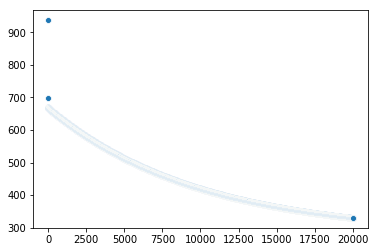

In [8]:
numEpochs= 20000
alpha = 0.0002
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width = 500 />

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise